# Using "Internet Advertisements" dataset from  
### https://archive.ics.uci.edu/dataset/51/internet+advertisements
### or
### https://www.kaggle.com/datasets/uciml/internet-advertisements-data-set/data

# Project of ESMA KARA and DİLARA TOP

<h3>DATA PREPROCESSING<h3>

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats as sp
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest
from scipy.stats import shapiro

In [2]:
# reading dataframe
# low_memory=True by default is used to read large files with less memory
# False can read files faster using more memory
df = pd.read_csv('add.csv')

# showing first 5 rowsthe operations will be applied directly on the original file
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,0,125,125,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,1,57,468,8.2105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,2,33,230,6.9696,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,3,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,4,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [3]:
# dropping the unnamed:0 column 
# axis=1 refers to columns.
df.drop('Unnamed: 0',inplace=True, axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [4]:
# rename the column names 
# if inplace=false then does not make any changes to the main file,
# if true then the operations will be applied directly on the original file.
df.rename(columns={'0':'height', '1':'width', '2':'ratio(width/height)',
                   '3':'local', '1558':'ad status'}, inplace=True)
# showing last 5 rows
df.tail()

,height,width,ratio(width/height),local,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,ad status
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3278,40,40,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [5]:
# dropping useless columns
df.drop(df.iloc[:, 4:1558], inplace=True, axis=1)
df

,height,width,ratio(width/height),local,ad status
0,125,125,1,1,ad.
1,57,468,8.2105,1,ad.
2,33,230,6.9696,1,ad.
3,60,468,7.8,1,ad.
4,60,468,7.8,1,ad.
...,...,...,...,...,...
3274,170,94,0.5529,0,nonad.
3275,101,140,1.3861,1,nonad.
3276,23,120,5.2173,1,nonad.
3277,?,?,?,1,nonad.


In [6]:
# as seen, they're all False because in our dataset, the null/NaN values represented by the "?" symbol
df.isnull()

,height,width,ratio(width/height),local,ad status
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3274,False,False,False,False,False
3275,False,False,False,False,False
3276,False,False,False,False,False
3277,False,False,False,False,False


In [7]:
# checking if there is any null/nan value
# and showing the counts of null values column by column.
df.iloc[:,:].isnull().sum()

height                 0
width                  0
ratio(width/height)    0
local                  0
ad status              0
dtype: int64

In [8]:
# df.iloc[:, :].replace('?', pd.NA, inplace=True)

# replacing ? symbol to NaN values for ease of work
dfn = df.applymap(lambda x:np.nan if isinstance(x,str) and '?' in x else x)
dfn

,height,width,ratio(width/height),local,ad status
0,125,125,1,1,ad.
1,57,468,8.2105,1,ad.
2,33,230,6.9696,1,ad.
3,60,468,7.8,1,ad.
4,60,468,7.8,1,ad.
...,...,...,...,...,...
3274,170,94,0.5529,0,nonad.
3275,101,140,1.3861,1,nonad.
3276,23,120,5.2173,1,nonad.
3277,NaN,NaN,NaN,1,nonad.


In [9]:
dfn.isnull().sum()

height                 903
width                  901
ratio(width/height)    910
local                   15
ad status                0
dtype: int64

In [10]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   height               2376 non-null   object
 1   width                2378 non-null   object
 2   ratio(width/height)  2369 non-null   object
 3   local                3264 non-null   object
 4   ad status            3279 non-null   object
dtypes: object(5)
memory usage: 128.2+ KB


In [11]:
# converting the columns from object datatype to float
dfn['height'] = dfn['height'].astype(float)
dfn['width'] = dfn['width'].astype(float)
dfn['ratio(width/height)'] = dfn['ratio(width/height)'].astype(float)

# dfn = dfn.apply(lambda x: x.astype(float) if x.dtype == 'object' else x)

In [12]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               2376 non-null   float64
 1   width                2378 non-null   float64
 2   ratio(width/height)  2369 non-null   float64
 3   local                3264 non-null   object 
 4   ad status            3279 non-null   object 
dtypes: float64(3), object(2)
memory usage: 128.2+ KB


<h3>Showing the Relations Between Columns<h3>

In [13]:
# copying dataframe for not effecting our original dataframe 
dfn_ad_copy = dfn.copy()

# replaccing ad. and nonad. values to bit values for correlation application
dfn_ad_copy.iloc[:, 4].replace('ad.', 1, inplace=True)
dfn_ad_copy.iloc[:, 4].replace('nonad.', 0, inplace=True)

In [14]:
# correlation application
correlation_table = dfn_ad_copy.corr()

# Print the correlation matrix
print(correlation_table)

                       height     width  ratio(width/height)     local  \
height               1.000000  0.181202            -0.285051 -0.188005   
width                0.181202  1.000000             0.535732 -0.025645   
ratio(width/height) -0.285051  0.535732             1.000000  0.109068   
local               -0.188005 -0.025645             0.109068  1.000000   
ad status            0.027404  0.570683             0.124462  0.007773   

                     ad status  
height                0.027404  
width                 0.570683  
ratio(width/height)   0.124462  
local                 0.007773  
ad status             1.000000  


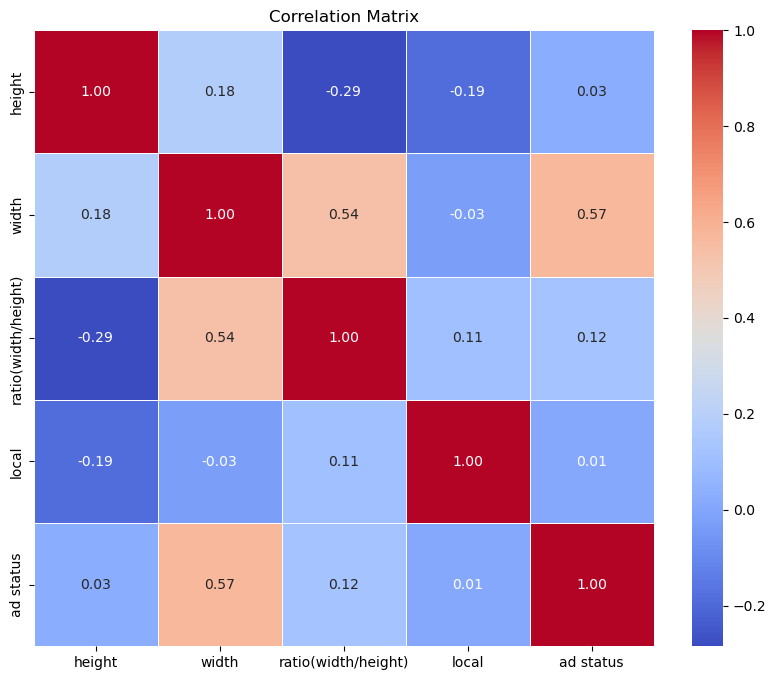

In [15]:
# creates a figure and specifies its size
plt.figure(figsize=(10, 8))

# annot=True adds numerical values to each cell 
# cmap='coolwarm' sets the color map,  which ranges from cool colors (blue) for negative correlations to 
#warm colors (red) for positive correlations
# fmt=".2f" specifies the format of the numerical values
# linewidths=.5 sets the width of the lines between cells
sb.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

<h3>Filling Missing Values<h3>

In [16]:
# Make a copy of the DataFrame
dfcopy = dfn.copy()

# Converting DataFrame to a numpy array
dfcopy_array = dfcopy.iloc[:, 0:3].values

# Calculating the median ignoring missing values
column_nanmedian = np.nanmedian(dfcopy_array, axis=0)
print(column_nanmedian)

# Filling missing values with the median
dfcopy.fillna({"height": column_nanmedian[0], 
               "width": column_nanmedian[1], 
               "ratio(width/height)": column_nanmedian[2]},
               inplace=True)

# Printing statistics
print("\nİstatistikler - Eksik değerleri medyan ile doldurmuş veri seti:")
dfcopy.describe()

[ 51.    110.      2.102]

İstatistikler - Eksik değerleri medyan ile doldurmuş veri seti:


,height,width,ratio(width/height)
count,3279.000000,3279.000000,3279.000000
mean,60.435804,142.885026,3.409648
std,47.064669,112.564585,5.199722
min,1.000000,1.000000,0.001500
25%,32.500000,90.000000,1.279400
50%,51.000000,110.000000,2.102000
75%,61.000000,144.000000,3.900000
max,640.000000,640.000000,60.000000


In [17]:
# converting dataframe to a numpy array
dfn_array = dfn.iloc[:, 0:3].values

# calculating the mean ignoring missing values
column_nanmeans = np.nanmean(dfn_array, axis=0)
print(column_nanmeans)

# filling the nan values with the calculated mean
dfn.fillna({"height": column_nanmeans[0], 
            "width": column_nanmeans[1], 
            "ratio(width/height)": column_nanmeans[2]},
            inplace=True)

# this line of code makes the same thing with just one line
# dfn.iloc[:,0:3] = dfn.iloc[:,0:3].fillna(dfn.iloc[:,0:3].dropna().mean())

[ 64.02188552 155.34482759   3.91195251]


<h3>Difference between filling dataframe's null values with mean and median values<h3>

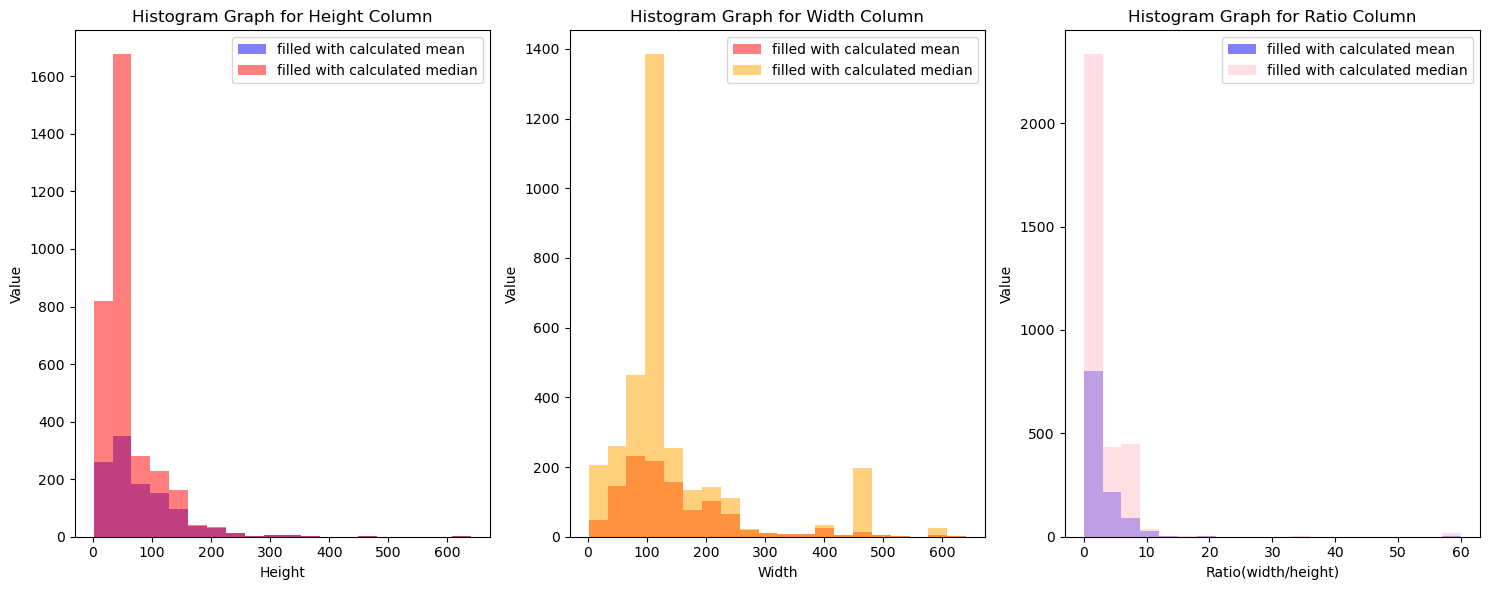

In [55]:
plt.figure(figsize=(15, 6))

# for Height 
plt.subplot(1, 3, 1)
plt.hist(dfn.iloc[:, 0], bins=20, alpha=0.5, color='blue', label='filled with calculated mean')
plt.hist(dfcopy.iloc[:, 0], bins=20, alpha=0.5, color='red', label='filled with calculated median')
plt.xlabel('Height')
plt.ylabel('Value')
plt.title('Histogram Graph for Height Column')
plt.legend()

# for Width 
plt.subplot(1, 3, 2)
plt.hist(dfn.iloc[:, 1], bins=20, alpha=0.5, color='red', label='filled with calculated mean')
plt.hist(dfcopy.iloc[:, 1], bins=20, alpha=0.5, color='orange', label='filled with calculated median')
plt.xlabel('Width')
plt.ylabel('Value')
plt.title('Histogram Graph for Width Column')
plt.legend()

# for Ratio 
plt.subplot(1, 3, 3)
plt.hist(dfn.iloc[:, 2], bins=20, alpha=0.5, color='blue', label='filled with calculated mean')
plt.hist(dfcopy.iloc[:, 2], bins=20, alpha=0.5, color='pink', label='filled with calculated median')
plt.xlabel('Ratio(width/height)')
plt.ylabel('Value')
plt.title('Histogram Graph for Ratio Column')
plt.legend()

plt.tight_layout()
plt.show()

# Medyan ile doldurulduğunda belirli değerler çok fazla tekrar ediyor görünüyor. Ortalama ile doldurulduğunda daha stabil
# ilerleyen verilerle çalışabileceğimizi düşündüğümüz için veri setimizin bu yönde manipüle edilmiş halini kullanacağız.

In [19]:
dfn.isnull().sum()

height                  0
width                   0
ratio(width/height)     0
local                  15
ad status               0
dtype: int64

In [20]:
# removing the remaining empty values from the data set
dfn.dropna(inplace=True)
dfn

,height,width,ratio(width/height),local,ad status
0,125.000000,125.000000,1.000000,1,ad.
1,57.000000,468.000000,8.210500,1,ad.
2,33.000000,230.000000,6.969600,1,ad.
3,60.000000,468.000000,7.800000,1,ad.
4,60.000000,468.000000,7.800000,1,ad.
...,...,...,...,...,...
3274,170.000000,94.000000,0.552900,0,nonad.
3275,101.000000,140.000000,1.386100,1,nonad.
3276,23.000000,120.000000,5.217300,1,nonad.
3277,64.021886,155.344828,3.911953,1,nonad.


In [21]:
# checking if there is repeated data
dfn.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
3274    False
3275    False
3276    False
3277     True
3278     True
Length: 3264, dtype: bool

In [22]:
# removing repeated data
dfn.drop_duplicates(inplace=True)
dfn

,height,width,ratio(width/height),local,ad status
0,125.0,125.0,1.0000,1,ad.
1,57.0,468.0,8.2105,1,ad.
2,33.0,230.0,6.9696,1,ad.
3,60.0,468.0,7.8000,1,ad.
6,59.0,460.0,7.7966,1,ad.
...,...,...,...,...,...
3272,106.0,110.0,1.0377,1,nonad.
3273,30.0,30.0,1.0000,0,nonad.
3274,170.0,94.0,0.5529,0,nonad.
3275,101.0,140.0,1.3861,1,nonad.


In [23]:
df1 = dfn.reset_index(drop=True)
df1

,height,width,ratio(width/height),local,ad status
0,125.0,125.0,1.0000,1,ad.
1,57.0,468.0,8.2105,1,ad.
2,33.0,230.0,6.9696,1,ad.
3,60.0,468.0,7.8000,1,ad.
4,59.0,460.0,7.7966,1,ad.
...,...,...,...,...,...
1141,106.0,110.0,1.0377,1,nonad.
1142,30.0,30.0,1.0000,0,nonad.
1143,170.0,94.0,0.5529,0,nonad.
1144,101.0,140.0,1.3861,1,nonad.


In [24]:
df1.isnull().sum()

height                 0
width                  0
ratio(width/height)    0
local                  0
ad status              0
dtype: int64

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               1146 non-null   float64
 1   width                1146 non-null   float64
 2   ratio(width/height)  1146 non-null   float64
 3   local                1146 non-null   object 
 4   ad status            1146 non-null   object 
dtypes: float64(3), object(2)
memory usage: 44.9+ KB


In [26]:
# To get the mean, mode, and median values of specific columns
descriptive_stats = df1.iloc[:, 0:3]
statistics_df1 = pd.DataFrame({
    'Column': descriptive_stats.columns,
    'Mean': descriptive_stats.mean(),
    'Mod': descriptive_stats.mode().iloc[0],
    'Median': descriptive_stats.median()
})

print(statistics_df1)

                                  Column        Mean    Mod    Median
height                            height   79.493287   60.0   61.5000
width                              width  143.307546  150.0  120.0000
ratio(width/height)  ratio(width/height)    2.921927    1.0    1.5568


<h3>GRAPHICAL METHODS AND STATISTICAL TESTS FOR WIDTH COLUMN<h3>

In [27]:
# for width column 
# using Histogram graph, Q-Q plot graph, K2 test and Z test 

In [28]:
# second (width) column
width = df1.iloc[:, 1]

width

0       125.0
1       468.0
2       230.0
3       468.0
4       460.0
        ...  
1141    110.0
1142     30.0
1143     94.0
1144    140.0
1145    120.0
Name: width, Length: 1146, dtype: float64

Text(0.5, 1.0, 'Histogram Graph for Width Column')

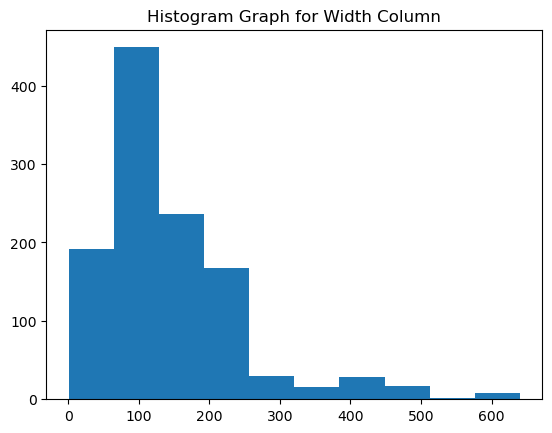

In [29]:
# plotting a histogram graph for width column
plt.hist(width)
plt.title("Histogram Graph for Width Column")

Text(0.5, 1.0, 'Q-Q Plot Graph for Width Column')

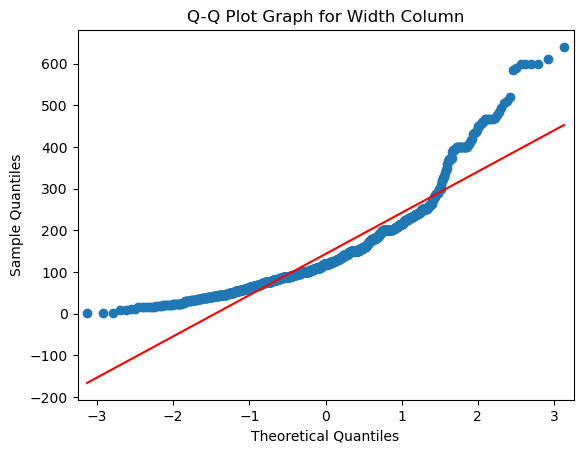

In [30]:
# plotting a Q-Q graph for width column
qqplot(width, line='s')
plt.title("Q-Q Plot Graph for Width Column")

In [31]:
# selecting a sample from the width column where the index increases by five each time
#sistematik basit rastgele örnekleme
stride = 5
sample_indices = range(0, len(width), stride)

population = np.array([])
# The values of the indices in the created sample are assigned to an empty array if they are less than or equal to 200
for i in sample_indices:
    if(width.iloc[i] <= 200):
        population = np.append(population, width.iloc[i])
population # 186 data

array([125.        ,   2.        , 147.        , 126.        ,
       120.        ,  75.        ,  69.        , 200.        ,
        43.        , 150.        , 148.        ,  57.        ,
        92.        ,  50.        , 110.        ,  75.        ,
        46.        ,  93.        , 101.        ,  64.        ,
       155.34482759, 200.        ,  75.        , 150.        ,
       184.        , 152.        , 139.        ,  64.        ,
       156.        , 200.        , 100.        ,  86.        ,
       113.        , 151.        , 125.        , 127.        ,
        94.        , 110.        ,  15.        ,  90.        ,
        37.        , 101.        , 126.        ,  95.        ,
        64.        ,  96.        , 156.        ,  50.        ,
        11.        , 162.        ,  75.        , 127.        ,
        38.        ,  75.        ,  73.        ,  66.        ,
       128.        , 200.        ,  56.        , 161.        ,
        50.        , 149.        ,  87.        , 133.  

In [32]:
# transforming np.array to pd.dataframe to use the pd.describe module
temp_p = pd.DataFrame(population)
temp_p.describe()

,0
count,186.000000
mean,101.501854
std,43.337364
min,2.000000
25%,70.000000
50%,100.000000
75%,126.750000
max,200.000000


Text(0.5, 1.0, 'Histogram Graph for Population')

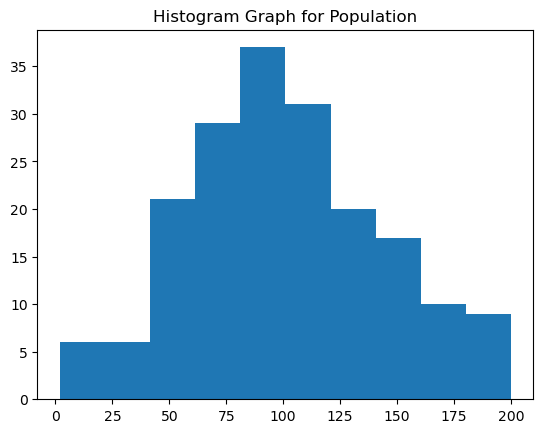

In [33]:
# plotting a histogram graph for population
plt.hist(population)
plt.title("Histogram Graph for Population")

Text(0.5, 1.0, 'Q-Q Plot Graph for Population')

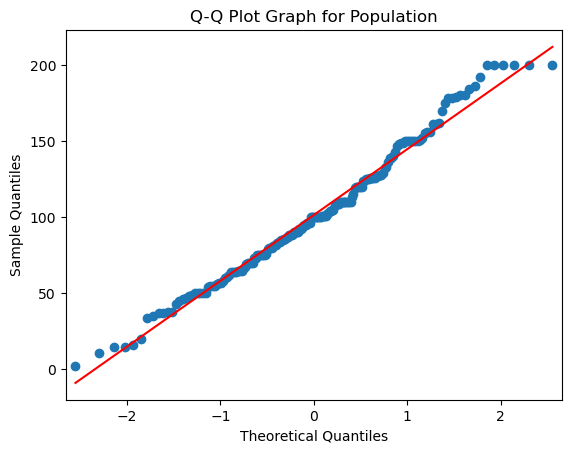

In [34]:
# plotting Q-Q graph for population
qqplot(population, line='s')
plt.title("Q-Q Plot Graph for Population")

In [35]:
# H0: The data is normally distributed
# H1: The data is NOT normally distributed.

k2test_value, p_value = sp.normaltest(population)
print("k2: " + str(k2test_value) + "  p: " + str(p_value))

k2: 3.3714727605772956  p: 0.1853079245984712


In [36]:
p = 0.1
if(p_value < p):
    print("Sıfır hipotezi reddedilir.")
else:
    print("Sıfır hipotezi reddedilemez.")
# if H0 cannot be rejected, it means that the dataset follows a normal distribution.

Sıfır hipotezi reddedilemez.


<h3>Z Test Application<h3>

In [37]:
population_stats = sp.describe(population)
population_stats
# nobs is the number of items in the dataset

DescribeResult(nobs=186, minmax=(2.0, 200.0), mean=101.5018539117538, variance=1878.1271071270723, skewness=0.2974644051181648, kurtosis=-0.290482241750329)

In [38]:
sample = np.array([])
# creating a sample by generating random numbers for indices
#basit rastgele örnekleme
n = 50
np.random.seed(50)
for i in range(n):
    random_number = np.random.randint(0, len(population))
    sample = np.append(sample, population[random_number])
print(len(sample))

50


In [39]:
# necessary variables for the z-test if we will not use the function
sample_mean = np.mean(sample)
population_mean = population_stats[2]
population_std = math.sqrt(population_stats[3])
sample_size = len(sample)
print("Sample mean: " + str(sample_mean) + "\n" +
      "Population mean: " + str(population_mean) + "\n" +
      "Population standard deviation: " + str(population_std) + "\n" +
      "Sample size: " + str(sample_size))

Sample mean: 100.3
Population mean: 101.5018539117538
Population standard deviation: 43.33736386914959
Sample size: 50


In [40]:
# application of the z-test
# hypotheses;

# Kendi sitesine görsel/reklam eklemek isteyen biri görsellerin genişliğinin ortalama 100 birim olduğunu düşünmektedir.
# 50 farklı siteden alınan verilere göre görsel genişliğinin ortalaması 100.3'tür. Buna göre görsellerin genişliğinin 
# ortalama değeri 101.5 ve standart sapması 43.33 olduğuna göre site sahibinin iddiasının %1 anlamlılık düzeyinde doğru
# olup olmadığını belirtelim.
# H0: M = 100
# H1: M != 100

ztest_value, p_value = ztest(sample, value=100, alternative='two-sided')
print("z: " + str(ztest_value) + "  p: " + str(p_value))

z: 0.062328810983884465  p: 0.9503009852278792


In [41]:
# explication
alfa = 0.01
if(p_value < alfa):
    print("Sıfır hipotezi reddedilir.")
else:
    print("Sıfır hipotezi reddedilemez.")
# since H0 can NOT be rejected, we can say that the mean of the images is 100 at the 1% significance level

Sıfır hipotezi reddedilemez.


<h3>GRAPHICAL METHODS AND STATISTICAL TESTS FOR HEIGHT COLUMN<h3>

In [42]:
# for height column 
# using Histogram graph, Box Plot graph, Shapiro-Wilk test

In [43]:
# height column
height = df1.iloc[:, 0]
height

0       125.0
1        57.0
2        33.0
3        60.0
4        59.0
        ...  
1141    106.0
1142     30.0
1143    170.0
1144    101.0
1145     23.0
Name: height, Length: 1146, dtype: float64

Text(0.5, 1.0, 'Histogram Graph for Height Column')

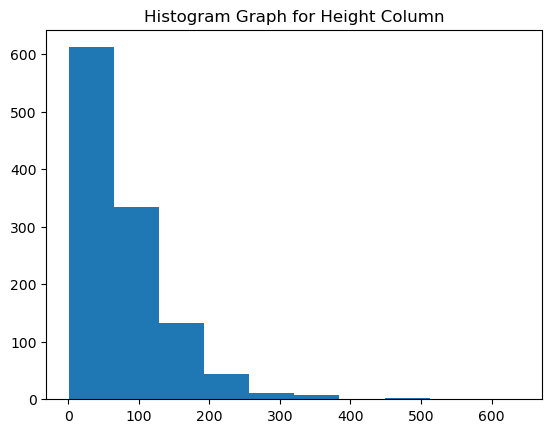

In [44]:
# plotting a histogram graph for height column
plt.hist(height)
plt.title("Histogram Graph for Height Column")

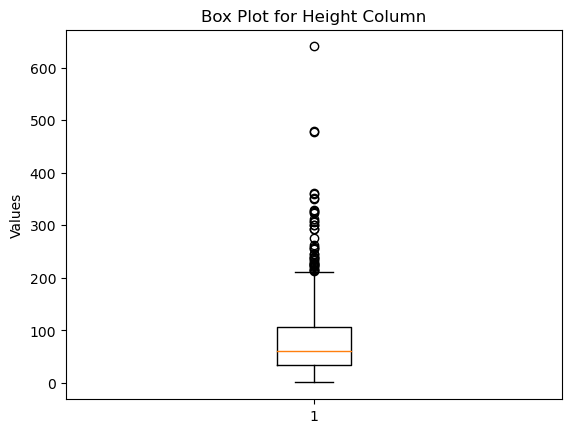

In [45]:
# plotting a box plot for height column
plt.boxplot(height)
plt.title("Box Plot for Height Column")
plt.ylabel("Values")
plt.show()

Sample:
0       125.0
50       73.0
100      80.0
150      11.0
200     172.0
250      23.0
300      92.0
350      85.0
400     115.0
450     118.0
500      46.0
550     170.0
600     105.0
650     151.0
700      83.0
750      52.0
800      47.0
850     210.0
900     162.0
950     325.0
1000    137.0
1050    100.0
1100     60.0
Name: height, dtype: float64


Text(0.5, 1.0, 'Histogram Graph for Sample')

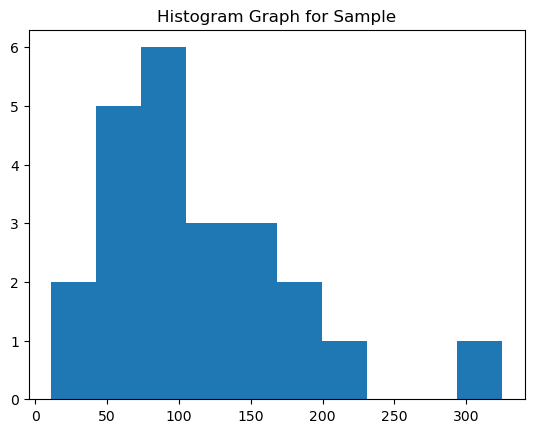

In [46]:
# selecting a sample from the height column where the index increases by fifty each time
#sistematik basit rastgele örnekleme
sample = height[::50]
print("Sample:")
print(sample)

# plotting a histogram graph for sample
plt.hist(sample)
plt.title("Histogram Graph for Sample")

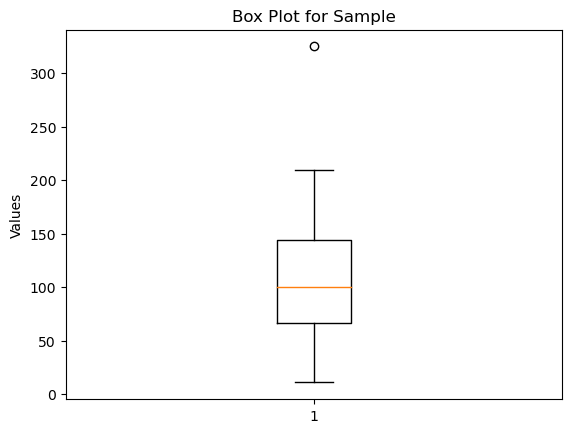

In [47]:
# plotting a box plot for sample
plt.boxplot(sample)
plt.title("Box Plot for Sample")
plt.ylabel("Values")
plt.show()

# aykırı değerin olduğu, her iki grafiksel gösterimde de görünmekte
# The outlier is visible in both graphical representations/methods.

In [48]:
# Shapiro-Wilk test for sample which contains OUTLIER(AYKIRI DEĞER)
stat, p_value = shapiro(sample)

print("Test İstatistiği:", stat)
print("p-değeri:", p_value)

# H0: The data is normally distributed
# H1: The data is NOT normally distributed.

if p_value > 0.05:
    print("Örneklem normal dağılıma uyuyor.")
else:
    print("Örneklem normal dağılıma uymuyor.")
    
# if H0 rejected, it means that the dataset does NOT follow a normal distribution.

Test İstatistiği: 0.9129422307014465
p-değeri: 0.04712770879268646
Örneklem normal dağılıma uymuyor.


New Sample:
0       125.0
50       73.0
100      80.0
150      11.0
200     172.0
250      23.0
300      92.0
350      85.0
400     115.0
450     118.0
500      46.0
550     170.0
600     105.0
650     151.0
700      83.0
750      52.0
800      47.0
850     210.0
900     162.0
1000    137.0
1050    100.0
1100     60.0
Name: height, dtype: float64


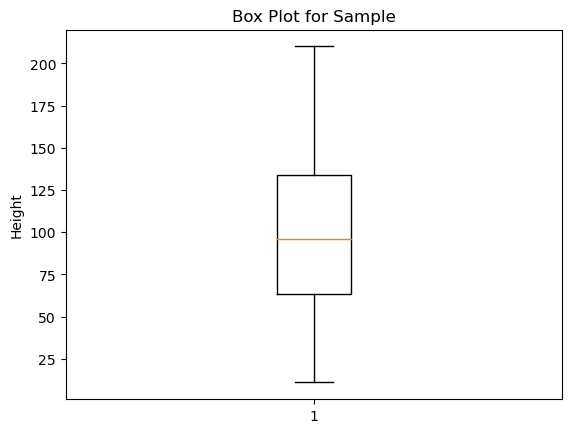

In [49]:
# creating the same sample to apply graphical methods and statistical tests, when there are no outliers in the dataset
sample1 = height[::50]

# deleting outlier, 950. index
del sample1[950]

# plotting a box plot for new sample
print("New Sample:")
print(sample1)
plt.boxplot(sample1)
plt.title("Box Plot for Sample")
plt.ylabel("Height")
plt.show()

# there is no more outlier

In [50]:
# Shapiro-Wilk test for new sample which does NOT contain OUTLIER(AYKIRI DEĞER)

# applying shapiro-wilk test 
stat, p_value = shapiro(sample1)

print("Test İstatistiği:", stat)
print("p-değeri:", p_value)

# H0: The data is normally distributed
# H1: The data is NOT normally distributed.

if p_value > 0.05:
    print("Örneklem normal dağılıma uyuyor.")
else:
    print("Örneklem normal dağılıma uymuyor.")
    
# if H0 can NOT be rejected, it means that the dataset follows a normal distribution.

# We observed that our dataset did not fit a normal distribution when there were outliers, but it did fit a normal
#distribution when there were none. We have seen how outliers can affect/change the dataset.

Test İstatistiği: 0.9830598831176758
p-değeri: 0.9568560719490051
Örneklem normal dağılıma uyuyor.


<h3>T Test Application<h3>

In [51]:
# separating rows according to the 'ad status' column
ad_data = df1[df1['ad status'] == 'ad.']
nonad_data = df1[df1['ad status'] == 'nonad.']

print("Ad Data:")
print(ad_data)

print("\nNon-Ad Data:")
print(nonad_data)

Ad Data:
    height  width  ratio(width/height) local ad status
0    125.0  125.0               1.0000     1       ad.
1     57.0  468.0               8.2105     1       ad.
2     33.0  230.0               6.9696     1       ad.
3     60.0  468.0               7.8000     1       ad.
4     59.0  460.0               7.7966     1       ad.
..     ...    ...                  ...   ...       ...
88    38.0  264.0               6.9473     1       ad.
89    55.0  416.0               7.5636     1       ad.
90    36.0  216.0               6.0000     1       ad.
91    72.0  144.0               2.0000     1       ad.
92    50.0  150.0               3.0000     1       ad.

[93 rows x 5 columns]

Non-Ad Data:
          height       width  ratio(width/height) local ad status
93     64.021886  155.344828             3.911953     1    nonad.
94     46.000000  109.000000             2.369500     1    nonad.
95     12.000000   57.000000             4.750000     1    nonad.
96     95.000000  150.000000  

In [52]:
# creating a sample which has 9 value
ad_sample = ad_data[:9]
nonad_sample = nonad_data[:9]

In [53]:
# application of the t-test
# hypotheses;

# Oran(ratio) sütununa göre elimizde bulunan görsellerin reklam olma(ad.) ve reklam olmama(nonad.) durumları/olasılıkları
# karşılaştırılacaktır. Her iki veri setinden de 9 görselden oluşan örneklemler alınır. Bu iki veri seti arasındaki durumu
# %5 anlamlılık düzeyinde yorumlayalım.
# H0: İki veri setinin dağılımları eşittir.
# H1: İki veri setinin dağılımları eşit değildir.

# ratio(height/width) columns for each sample
ad_sample_ratio = ad_sample.iloc[:,2]
nonad_sample_ratio = nonad_sample.iloc[:,2]

statistic, p_value = sp.ttest_ind(ad_sample_ratio, nonad_sample_ratio)
print(sp.ttest_ind(ad_sample_ratio, nonad_sample_ratio))

TtestResult(statistic=1.2348613357630482, pvalue=0.23470998783691055, df=16.0)


In [54]:
# explication
alfa = 0.05
if(p_value < alfa):
    print("Sıfır hipotezi reddedilir.")
else:
    print("Sıfır hipotezi reddedilemez.")

# eğer H0 reddedilemez ise oran sütunua göre görsellerin reklam olma ve olmama olasılıkları eşit çıkmaktadır.

Sıfır hipotezi reddedilemez.
